# IMPACT ASSESSMENT OF DIFFERENCES IN DISTRIBUTIONS OF CESIUM FEATURES VALUES

This _Notebook_ analyses more in depth the differences found in _cesium_ features distributions between ML subsmample and S4 sample.

We need to answer these questions:

- What are the features showing more discrepancies between S4 sample and ML subsample?
- What are the types of this feature? (i.e. Cadence/error features, General features, or Lomb-Scargle - periodic - features)
- Do the features showing greater discrepancies in ML / S4 comparison also show discrepancies in Pulsating / Non-pulsating comparison.

## Modules and configuration

### Modules

In [1]:
import pandas as pd

from scipy.stats import pearsonr

import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white", {'figure.figsize':(15,10)})

### Configuration

In [2]:
FILE = "../data/Cesium_Features_Distributions_Analysis.csv"
REL_FILE = "../data/REL_Cesium_Features_Distributions_Analysis.csv"
UNREL_FILE = "../data/UNREL_Cesium_Features_Distributions_Analysis.csv"
COMP_CORR_S4_ML_FILE = "../data/Cesium_CompareCorr_ML_S4.csv"
COMP_CORR_P_NP_FILE = "../data/Cesium_CompareCorr_S4P_S4NP.csv"
FEATURES_FILE = "./cesium_Features_by_Category.csv"

#REL_FEATURES_OUT = "../data/ML_MODELS/ML_pipeline_steps/Reliable_features.pickle"
#UNREL_FEATURES_OUT = "../data/ML_MODELS/ML_pipeline_steps/Unreliable_features.pickle"

IMAGE_FOLDER = "./img/"

### Functions

In [3]:
def draw_heatmap(data, fig_title=None, xlabel=None, ylabel=None, xsize=None, ysize=None, fig_filename=None, kwargs={}):
    '''Plots a heatmap, setting the title and saving the figure to disk if needed'''
    plt.figure(figsize=(10,7))
    if xsize is None:
        xsize = 'small'
    plt.xticks(fontsize=xsize)
    if ysize is None:
        ysize = 'small'
    plt.yticks(fontsize=ysize)
    sns.heatmap(data, **kwargs)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    if fig_title is None:
        plt.title("Heatmap")
    else:
        plt.title(fig_title)
    if fig_filename is None:
        pass
    else:
        plt.savefig(fig_filename, format='jpg')

In [4]:
def scatter_graph(data, var_x, var_y, fig_title, x_label, y_label, fig_filename=None):
    '''Plots a scatter plot of two columns of a dataframe.
    It also calculates and shows Pearson's correlation coefficient.'''
    #rv_x_var = var_x
    #tess_y_var = var_y
    #kwargs = dict(hist_kws={'alpha':.4}, kde_kws={'linewidth':2})
    plt.figure(figsize=(10,7))
    plt.title(fig_title, fontsize=16)
    #plt.grid(axis='both', alpha=0.75)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    sns.scatterplot(data=data, x=var_x, y=var_y)
#    plt.xlim(0.0, 1.0)
#    plt.ylim(0.0, 1.0)    
    plt.legend(loc='upper right');
    # Save the image:
    if fig_filename is None:
        pass
    else:
        plt.savefig(fig_filename, format='jpg')
    # Calculate the Pearson correlation coefficient between the two results:
    corr, _ = pearsonr(data[var_x], data[var_y])
    print('Pearson\'s correlation value: %.3f' % corr)

## Read data

In [5]:
results = pd.read_csv(FILE, sep=',', decimal='.')
results

,Feature_ID,Feature,WMW_U,WMW_pvalue,KS_D,KS_pvalue,AD_A,AD_pvalue(capped),PNP_WMW_U,PNP_WMW_pvalue,...,PNP_AD_pvalue(capped),CARMENES_dist_name,CARMENES_dist_loc,CARMENES_dist_scale,S4_dist_name,S4_dist_loc,S4_dist_scale,Same distribution,loc_rel_error,scale_rel_error
0,0,all_times_nhist_numpeaks,120782.0,3.793472e-01,0.035223,9.654118e-01,-0.668456,0.250000,41294.0,0.056156,...,0.052183,dweibull,9.505607,2.797284,dweibull,9.459108,2.762612,True,-0.004892,-0.012395
1,1,all_times_nhist_peak1_bin,114581.5,6.949720e-01,0.022953,9.999161e-01,-1.140590,0.250000,52231.5,0.042966,...,0.050768,lognorm,-3.983369,17.784238,lognorm,-3.680941,17.823147,True,-0.075923,0.002188
2,2,all_times_nhist_peak2_bin,107056.0,2.103276e-01,0.051648,6.715164e-01,-0.090395,0.250000,44097.0,0.653723,...,0.250000,gamma,-1.380690,9.039046,gamma,-1.956738,8.597630,True,0.417217,-0.048834
3,3,all_times_nhist_peak3_bin,106151.5,6.890811e-01,0.027485,9.979828e-01,-1.063720,0.250000,42598.5,0.661427,...,0.250000,beta,-0.039882,49.039882,uniform,0.000000,49.000000,False,-1.000000,-0.000813
4,4,all_times_nhist_peak4_bin,101541.0,8.068785e-01,0.015155,1.000000e+00,-1.246351,0.250000,43153.5,0.099353,...,0.095560,beta,-0.010813,49.010813,beta,-0.013671,49.013671,True,0.264307,0.000058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,107,p2p_scatter_2praw,150216.0,5.663501e-12,0.302768,7.941054e-16,42.684180,0.001000,45292.5,0.641272,...,0.250000,gamma,0.240604,0.251311,t,0.741211,0.191494,False,2.080618,-0.238019
108,108,p2p_scatter_over_mad,67319.0,9.443367e-24,0.397691,2.538640e-27,89.577543,0.001000,47409.5,0.769492,...,0.250000,genextreme,1.082060,0.409015,t,1.539546,0.262829,False,0.422792,-0.357411
109,109,p2p_scatter_pfold_over_mad,104825.0,1.707774e-02,0.109060,2.042568e-02,2.972474,0.019962,45865.0,0.794417,...,0.250000,t,1.155548,0.251029,t,1.225855,0.262841,True,0.060843,0.047053
110,110,p2p_ssqr_diff_over_var,63880.0,5.936770e-27,0.427193,1.304499e-31,97.297129,0.001000,48566.0,0.479040,...,0.250000,lognorm,-1.447226,3.070258,dweibull,2.014299,0.314695,False,-2.391834,-0.897502


In [6]:
results.shape

(112, 23)

In [7]:
reliable_f = pd.read_csv(REL_FILE, sep=',', decimal=".")
reliable_f

,Feature_ID,Feature,WMW_U,WMW_pvalue,KS_D,KS_pvalue,AD_A,AD_pvalue(capped),PNP_WMW_U,PNP_WMW_pvalue,PNP_KS_D,PNP_KS_pvalue,PNP_AD_A,PNP_AD_pvalue(capped)
0,0,all_times_nhist_numpeaks,120782.0,0.379347,0.035223,0.965412,-0.668456,0.250000,41294.0,0.056156,0.114784,0.157900,1.926957,0.052183
1,1,all_times_nhist_peak1_bin,114581.5,0.694972,0.022953,0.999916,-1.140590,0.250000,52231.5,0.042966,0.100532,0.282348,1.956274,0.050768
2,2,all_times_nhist_peak2_bin,107056.0,0.210328,0.051648,0.671516,-0.090395,0.250000,44097.0,0.653723,0.061212,0.852996,-0.249196,0.250000
3,3,all_times_nhist_peak3_bin,106151.5,0.689081,0.027485,0.997983,-1.063720,0.250000,42598.5,0.661427,0.075292,0.636367,-0.324552,0.250000
4,4,all_times_nhist_peak4_bin,101541.0,0.806879,0.015155,1.000000,-1.246351,0.250000,43153.5,0.099353,0.105254,0.234976,1.289896,0.095560
5,5,all_times_nhist_peak_1_to_2,111338.0,0.720849,0.024438,0.999710,-1.145389,0.250000,47354.5,0.454990,0.069626,0.728218,-0.631012,0.250000
6,6,all_times_nhist_peak_1_to_3,104684.0,0.472886,0.048635,0.740615,-0.587674,0.250000,47488.0,0.158786,0.092291,0.380512,-0.276310,0.250000
7,7,all_times_nhist_peak_1_to_4,96684.0,0.386845,0.043721,0.844377,-0.610713,0.250000,41927.0,0.250715,0.091432,0.391853,0.347375,0.240314
8,8,all_times_nhist_peak_2_to_3,104802.5,0.487681,0.033176,0.980196,-0.735724,0.250000,45527.5,0.502819,0.068681,0.743206,-0.871108,0.250000
9,9,all_times_nhist_peak_2_to_4,96329.5,0.343964,0.039227,0.919987,-0.628204,0.250000,41104.5,0.415710,0.109718,0.195913,0.271599,0.250000


In [8]:
reliable_f.shape

(48, 14)

In [9]:
unrel_f = pd.read_csv(UNREL_FILE, sep=',', decimal='.')
unrel_f

,Feature_ID,Feature,WMW_U,WMW_pvalue,KS_D,KS_pvalue,AD_A,AD_pvalue(capped),PNP_WMW_U,PNP_WMW_pvalue,PNP_KS_D,PNP_KS_pvalue,PNP_AD_A,PNP_AD_pvalue(capped)
0,13,avg_err,123830.0,1.342967e-01,0.123914,5.423224e-03,3.878581,0.008964,42064.5,0.104434,0.098558,0.304064,1.049588,0.120519
1,14,avgt,124735.0,9.251904e-02,0.106820,2.455578e-02,2.752296,0.024359,46342.0,0.928693,0.085422,0.476759,-0.905499,0.250000
2,35,mean,137387.0,1.981356e-05,0.170021,3.013092e-05,11.924888,0.001000,48146.0,0.577388,0.069454,0.730964,-0.528128,0.250000
3,37,med_err,125000.0,8.248455e-02,0.091326,7.950952e-02,2.074541,0.045454,43631.5,0.288352,0.085422,0.476759,0.317036,0.250000
4,40,std_err,131898.0,1.657390e-03,0.139579,1.115966e-03,7.626565,0.001000,39896.5,0.016335,0.150412,0.026239,3.119855,0.017489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,107,p2p_scatter_2praw,150216.0,5.663501e-12,0.302768,7.941054e-16,42.684180,0.001000,45292.5,0.641272,0.068595,0.744574,-0.769719,0.250000
60,108,p2p_scatter_over_mad,67319.0,9.443367e-24,0.397691,2.538640e-27,89.577543,0.001000,47409.5,0.769492,0.056319,0.911300,-0.964418,0.250000
61,109,p2p_scatter_pfold_over_mad,104825.0,1.707774e-02,0.109060,2.042568e-02,2.972474,0.019962,45865.0,0.794417,0.060096,0.867464,-0.913553,0.250000
62,110,p2p_ssqr_diff_over_var,63880.0,5.936770e-27,0.427193,1.304499e-31,97.297129,0.001000,48566.0,0.479040,0.096755,0.324889,-0.136372,0.250000


In [10]:
unrel_f.shape

(64, 14)

In [11]:
comp_s4_ml = pd.read_csv(COMP_CORR_S4_ML_FILE, sep=',', decimal='.', index_col=0)
comp_s4_ml

,all_times_nhist_numpeaks,all_times_nhist_peak1_bin,all_times_nhist_peak2_bin,all_times_nhist_peak3_bin,all_times_nhist_peak4_bin,all_times_nhist_peak_1_to_2,all_times_nhist_peak_1_to_3,all_times_nhist_peak_1_to_4,all_times_nhist_peak_2_to_3,all_times_nhist_peak_2_to_4,...,freq_signif_ratio_31,freq_varrat,freq_y_offset,linear_trend,medperc90_2p_p,p2p_scatter_2praw,p2p_scatter_over_mad,p2p_scatter_pfold_over_mad,p2p_ssqr_diff_over_var,scatter_res_raw
all_times_nhist_numpeaks,0.000000,0.009877,0.016906,-0.048354,0.001184,0.003705,0.017910,0.008014,0.016446,-0.003399,...,0.026084,0.140393,-0.050059,0.003676,0.046581,-0.060274,0.054362,0.089000,-0.034148,0.095175
all_times_nhist_peak1_bin,0.000735,0.000000,-0.021804,-0.028790,0.011213,0.031199,-0.009899,0.016752,-0.028804,-0.008560,...,-0.140212,-0.024529,0.068707,-0.007910,-0.065452,-0.024171,0.003802,-0.077693,0.073989,-0.028545
all_times_nhist_peak2_bin,0.020035,-0.012086,0.000000,0.004675,-0.030060,-0.042529,-0.042295,-0.031068,-0.021405,-0.004306,...,-0.039342,-0.107532,-0.041059,-0.003978,-0.039807,0.164074,-0.028896,0.014555,-0.075297,-0.098003
all_times_nhist_peak3_bin,-0.049513,-0.045776,0.001356,0.000000,0.014938,0.024072,0.020873,0.013326,0.012037,0.007523,...,0.007075,-0.019917,-0.048672,0.030002,-0.097961,0.106427,-0.078335,-0.080676,-0.060866,-0.004386
all_times_nhist_peak4_bin,0.008155,0.013111,-0.037433,0.009585,0.000000,-0.026847,-0.014548,-0.031239,-0.016246,-0.020666,...,0.031147,-0.087031,-0.008022,-0.075036,0.033618,0.065216,-0.126390,-0.040773,-0.208209,-0.061925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p2p_scatter_2praw,-0.068817,-0.006896,0.178947,0.085782,0.021356,-0.037827,0.020299,0.014371,0.019906,0.001108,...,0.255354,0.007399,0.105795,-0.106422,0.047199,0.000000,0.158627,0.172065,0.133778,-0.101220
p2p_scatter_over_mad,-0.006733,0.057228,-0.123012,-0.039559,-0.096321,0.132852,0.064291,0.077961,0.018591,0.015159,...,-0.308350,0.084777,-0.010660,0.117816,-0.087405,0.324286,0.000000,-0.068526,-0.112141,-0.088564
p2p_scatter_pfold_over_mad,0.063554,-0.047638,-0.039621,0.001473,-0.051886,0.080728,0.084346,0.105909,0.083090,0.054217,...,-0.047590,0.099068,0.012258,0.048923,0.012690,0.066025,0.014595,0.000000,-0.143618,-0.009167
p2p_ssqr_diff_over_var,-0.015611,0.050604,-0.129699,-0.062818,-0.193203,0.122200,0.101843,0.148019,0.097491,0.094080,...,-0.278147,0.181379,-0.219232,0.134093,0.015956,0.197090,-0.252548,0.024314,0.000000,0.137890


In [12]:
comp_p_np = pd.read_csv(COMP_CORR_P_NP_FILE, sep=',', decimal='.', index_col=0)
comp_p_np

,all_times_nhist_numpeaks,all_times_nhist_peak1_bin,all_times_nhist_peak2_bin,all_times_nhist_peak3_bin,all_times_nhist_peak4_bin,all_times_nhist_peak_1_to_2,all_times_nhist_peak_1_to_3,all_times_nhist_peak_1_to_4,all_times_nhist_peak_2_to_3,all_times_nhist_peak_2_to_4,...,freq_signif_ratio_31,freq_varrat,freq_y_offset,linear_trend,medperc90_2p_p,p2p_scatter_2praw,p2p_scatter_over_mad,p2p_scatter_pfold_over_mad,p2p_ssqr_diff_over_var,scatter_res_raw
all_times_nhist_numpeaks,0.000000,-0.030595,0.011932,-0.103040,-0.045496,0.062859,0.096860,-0.049960,0.032359,-0.069716,...,0.134746,0.014272,0.009481,0.222515,-0.025736,0.085727,0.126985,0.143693,0.120038,0.027660
all_times_nhist_peak1_bin,-0.016645,0.000000,0.047144,0.284875,-0.001157,-0.179680,-0.061155,0.124493,0.136760,0.230398,...,-0.136465,-0.015519,-0.079468,-0.260768,0.119736,-0.120404,-0.060483,-0.155982,-0.025313,-0.019299
all_times_nhist_peak2_bin,0.027199,0.003626,0.000000,-0.092074,0.053121,0.074280,-0.051197,-0.029478,-0.088688,-0.074674,...,-0.099063,-0.041942,-0.024541,-0.021485,0.014801,-0.069728,-0.264300,-0.184074,0.054237,-0.040597
all_times_nhist_peak3_bin,-0.084283,0.281608,-0.090091,0.000000,-0.087412,0.192410,0.032699,-0.018000,-0.140694,-0.088303,...,0.045848,0.051654,-0.036528,-0.076764,0.039001,0.089231,0.203248,0.195217,0.068613,0.037368
all_times_nhist_peak4_bin,-0.018694,-0.025976,0.046340,-0.096750,0.000000,0.102712,0.145595,0.128688,0.121011,0.086606,...,0.064427,-0.022253,0.025303,0.019604,0.021574,-0.050556,-0.121187,-0.169496,-0.049213,-0.005905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p2p_scatter_2praw,0.001736,-0.122496,-0.028474,0.063645,-0.059905,0.147968,0.185496,0.185271,0.152634,0.122779,...,-0.170697,0.107286,0.198827,0.085394,-0.079420,0.000000,-0.414466,-0.410948,-0.221628,-0.046482
p2p_scatter_over_mad,0.125333,0.007040,-0.223986,0.160411,-0.052791,-0.111844,0.018286,0.188403,0.058138,0.280867,...,-0.053692,-0.015728,0.033070,0.016108,-0.076540,-0.125944,0.000000,0.042710,0.013552,0.183947
p2p_scatter_pfold_over_mad,0.134116,-0.023324,-0.064549,0.059791,-0.170803,-0.135574,-0.026813,0.105522,0.130732,0.193294,...,-0.112171,0.173772,0.230908,-0.144308,-0.097013,0.081602,-0.062542,0.000000,-0.004571,0.280339
p2p_ssqr_diff_over_var,0.241543,-0.114100,-0.049238,0.083632,0.007049,-0.063998,-0.081680,0.054547,-0.031483,0.063866,...,-0.110690,0.055842,-0.105197,-0.115447,0.076912,-0.123606,-0.057167,-0.139098,0.000000,0.022997


In [13]:
features = pd.read_csv(FEATURES_FILE, sep=';', decimal='.')
features

,Type,Feature,Description
0,Cadence/Error,all_times_nhist_numpeaks,Number of peaks (local maxima) in histogram of...
1,Cadence/Error,all_times_nhist_peak1_bin,Return the (bin) index of the ith largest peak...
2,Cadence/Error,all_times_nhist_peak2_bin,Return the (bin) index of the ith largest peak...
3,Cadence/Error,all_times_nhist_peak3_bin,Return the (bin) index of the ith largest peak...
4,Cadence/Error,all_times_nhist_peak4_bin,Return the (bin) index of the ith largest peak...
...,...,...,...
107,Lomb-Scargle (periodic),p2p_scatter_2praw,Get ratio of variability (sum of squared diffe...
108,Lomb-Scargle (periodic),p2p_scatter_over_mad,Get ratio of variability of folded and unfolde...
109,Lomb-Scargle (periodic),p2p_scatter_pfold_over_mad,Get ratio of median of period-folded data over...
110,Lomb-Scargle (periodic),p2p_ssqr_diff_over_var,Get sum of squared differences of consecutive ...


### Add more info to features arrays

In [14]:
results = results.merge(features, how='left', on='Feature')
results.head()

,Feature_ID,Feature,WMW_U,WMW_pvalue,KS_D,KS_pvalue,AD_A,AD_pvalue(capped),PNP_WMW_U,PNP_WMW_pvalue,...,CARMENES_dist_loc,CARMENES_dist_scale,S4_dist_name,S4_dist_loc,S4_dist_scale,Same distribution,loc_rel_error,scale_rel_error,Type,Description
0,0,all_times_nhist_numpeaks,120782.0,0.379347,0.035223,0.965412,-0.668456,0.25,41294.0,0.056156,...,9.505607,2.797284,dweibull,9.459108,2.762612,True,-0.004892,-0.012395,Cadence/Error,Number of peaks (local maxima) in histogram of...
1,1,all_times_nhist_peak1_bin,114581.5,0.694972,0.022953,0.999916,-1.140590,0.25,52231.5,0.042966,...,-3.983369,17.784238,lognorm,-3.680941,17.823147,True,-0.075923,0.002188,Cadence/Error,Return the (bin) index of the ith largest peak...
2,2,all_times_nhist_peak2_bin,107056.0,0.210328,0.051648,0.671516,-0.090395,0.25,44097.0,0.653723,...,-1.380690,9.039046,gamma,-1.956738,8.597630,True,0.417217,-0.048834,Cadence/Error,Return the (bin) index of the ith largest peak...
3,3,all_times_nhist_peak3_bin,106151.5,0.689081,0.027485,0.997983,-1.063720,0.25,42598.5,0.661427,...,-0.039882,49.039882,uniform,0.000000,49.000000,False,-1.000000,-0.000813,Cadence/Error,Return the (bin) index of the ith largest peak...
4,4,all_times_nhist_peak4_bin,101541.0,0.806879,0.015155,1.000000,-1.246351,0.25,43153.5,0.099353,...,-0.010813,49.010813,beta,-0.013671,49.013671,True,0.264307,0.000058,Cadence/Error,Return the (bin) index of the ith largest peak...


In [15]:
reliable_f = reliable_f.merge(features, how='left', on='Feature')
reliable_f.head()

,Feature_ID,Feature,WMW_U,WMW_pvalue,KS_D,KS_pvalue,AD_A,AD_pvalue(capped),PNP_WMW_U,PNP_WMW_pvalue,PNP_KS_D,PNP_KS_pvalue,PNP_AD_A,PNP_AD_pvalue(capped),Type,Description
0,0,all_times_nhist_numpeaks,120782.0,0.379347,0.035223,0.965412,-0.668456,0.25,41294.0,0.056156,0.114784,0.157900,1.926957,0.052183,Cadence/Error,Number of peaks (local maxima) in histogram of...
1,1,all_times_nhist_peak1_bin,114581.5,0.694972,0.022953,0.999916,-1.140590,0.25,52231.5,0.042966,0.100532,0.282348,1.956274,0.050768,Cadence/Error,Return the (bin) index of the ith largest peak...
2,2,all_times_nhist_peak2_bin,107056.0,0.210328,0.051648,0.671516,-0.090395,0.25,44097.0,0.653723,0.061212,0.852996,-0.249196,0.250000,Cadence/Error,Return the (bin) index of the ith largest peak...
3,3,all_times_nhist_peak3_bin,106151.5,0.689081,0.027485,0.997983,-1.063720,0.25,42598.5,0.661427,0.075292,0.636367,-0.324552,0.250000,Cadence/Error,Return the (bin) index of the ith largest peak...
4,4,all_times_nhist_peak4_bin,101541.0,0.806879,0.015155,1.000000,-1.246351,0.25,43153.5,0.099353,0.105254,0.234976,1.289896,0.095560,Cadence/Error,Return the (bin) index of the ith largest peak...


In [16]:
unrel_f = unrel_f.merge(features, how='left', on='Feature')
unrel_f.head()

,Feature_ID,Feature,WMW_U,WMW_pvalue,KS_D,KS_pvalue,AD_A,AD_pvalue(capped),PNP_WMW_U,PNP_WMW_pvalue,PNP_KS_D,PNP_KS_pvalue,PNP_AD_A,PNP_AD_pvalue(capped),Type,Description
0,13,avg_err,123830.0,0.134297,0.123914,0.005423,3.878581,0.008964,42064.5,0.104434,0.098558,0.304064,1.049588,0.120519,Cadence/Error,Mean of the error estimates.
1,14,avgt,124735.0,0.092519,0.106820,0.024556,2.752296,0.024359,46342.0,0.928693,0.085422,0.476759,-0.905499,0.250000,Cadence/Error,Mean of the time values.
2,35,mean,137387.0,0.000020,0.170021,0.000030,11.924888,0.001000,48146.0,0.577388,0.069454,0.730964,-0.528128,0.250000,Cadence/Error,Mean of observed values.
3,37,med_err,125000.0,0.082485,0.091326,0.079510,2.074541,0.045454,43631.5,0.288352,0.085422,0.476759,0.317036,0.250000,Cadence/Error,Median of error estimates.
4,40,std_err,131898.0,0.001657,0.139579,0.001116,7.626565,0.001000,39896.5,0.016335,0.150412,0.026239,3.119855,0.017489,Cadence/Error,Standard deviation of the error estimates.


## Analysis of unreliable features

### By type of feature

We first see the global numbers of each type

In [17]:
results[['Feature', 'Type']].groupby(by='Type').count()

,Feature
Type,
Cadence/Error,42
General,23
Lomb-Scargle (periodic),47


In [18]:
unrel_f[['Feature', 'Type']].groupby(by='Type').count()

,Feature
Type,
Cadence/Error,5
General,22
Lomb-Scargle (periodic),37


In [19]:
reliable_f[['Feature', 'Type']].groupby(by='Type').count()

,Feature
Type,
Cadence/Error,37
General,1
Lomb-Scargle (periodic),10


**OBSERVATION:** Not a good result. Such a high ratio of "Lomb-Scargle" features was somehow expected (by the periodogram analysis carried out), but the fact that almost every "General" feature is "unreliable" can be a fact to be worried about.

Let's see which features are unreliable of each group:

In [20]:
print(list(unrel_f.columns))

['Feature_ID', 'Feature', 'WMW_U', 'WMW_pvalue', 'KS_D', 'KS_pvalue', 'AD_A', 'AD_pvalue(capped)', 'PNP_WMW_U', 'PNP_WMW_pvalue', 'PNP_KS_D', 'PNP_KS_pvalue', 'PNP_AD_A', 'PNP_AD_pvalue(capped)', 'Type', 'Description']


### Unreliable features

In [21]:
unrel_f = unrel_f[['Type', 'Feature', 'Description', 'KS_D', 'PNP_KS_D']] \
    .sort_values(by='KS_D', ascending=False)
unrel_f

,Type,Feature,Description,KS_D,PNP_KS_D
20,General,qso_log_chi2_qsonu,Natural log of goodness of fit of qso-model gi...,0.909498,0.280391
24,General,stetson_j,Robust covariance statistic between pairs of o...,0.749579,0.097442
23,General,std,Standard deviation of observed values.,0.742579,0.081044
29,Lomb-Scargle (periodic),freq1_amplitude1,Get the amplitude of the jth harmonic of the i...,0.727159,0.172047
14,General,median_absolute_deviation,Median absolute deviation (from the median) of...,0.713661,0.069969
...,...,...,...,...,...
27,Lomb-Scargle (periodic),fold2P_slope_10percentile,Get alphath percentile of slopes of period-fol...,0.107661,0.091174
1,Cadence/Error,avgt,Mean of the time values.,0.106820,0.085422
13,General,median,Median of observed values.,0.104760,0.085337
11,General,max_slope,Compute the largest rate of change in the obse...,0.092644,0.071085


In [22]:
unrel_caderr = unrel_f[unrel_f['Type'] == 'Cadence/Error'][['Type', 'Feature', 'Description', 'KS_D', 'PNP_KS_D']] \
    .sort_values(by='KS_D', ascending=False)
unrel_caderr

,Type,Feature,Description,KS_D,PNP_KS_D
2,Cadence/Error,mean,Mean of observed values.,0.170021,0.069454
4,Cadence/Error,std_err,Standard deviation of the error estimates.,0.139579,0.150412
0,Cadence/Error,avg_err,Mean of the error estimates.,0.123914,0.098558
1,Cadence/Error,avgt,Mean of the time values.,0.106820,0.085422
3,Cadence/Error,med_err,Median of error estimates.,0.091326,0.085422


In [23]:
unrel_gen = unrel_f[unrel_f['Type'] == 'General'][['Type', 'Feature', 'Description', 'KS_D', 'PNP_KS_D']] \
    .sort_values(by='KS_D', ascending=False)
unrel_gen

,Type,Feature,Description,KS_D,PNP_KS_D
20,General,qso_log_chi2_qsonu,Natural log of goodness of fit of qso-model gi...,0.909498,0.280391
24,General,stetson_j,Robust covariance statistic between pairs of o...,0.749579,0.097442
23,General,std,Standard deviation of observed values.,0.742579,0.081044
14,General,median_absolute_deviation,Median absolute deviation (from the median) of...,0.713661,0.069969
18,General,percent_difference_flux_percentile,Difference between the 95th and 5th percentile...,0.653742,0.084736
5,General,amplitude,Half the difference between the maximum and mi...,0.535451,0.062157
6,General,flux_percentile_ratio_mid20,A ratio of ((50+x) flux percentile - (50-x) fl...,0.517824,0.033310
12,General,maximum,Maximum observed value.,0.504657,0.066363
7,General,flux_percentile_ratio_mid35,A ratio of ((50+x) flux percentile - (50-x) fl...,0.472116,0.060354
15,General,minimum,Minimum observed value.,0.442159,0.095295


In [24]:
unrel_ls = unrel_f[unrel_f['Type'] == 'Lomb-Scargle (periodic)'][['Type', 'Feature', 'Description', 'KS_D', 'PNP_KS_D']] \
    .sort_values(by='KS_D', ascending=False)
unrel_ls

,Type,Feature,Description,KS_D,PNP_KS_D
29,Lomb-Scargle (periodic),freq1_amplitude1,Get the amplitude of the jth harmonic of the i...,0.727159,0.172047
36,Lomb-Scargle (periodic),freq2_amplitude1,Get the amplitude of the jth harmonic of the i...,0.695991,0.129722
41,Lomb-Scargle (periodic),freq3_amplitude1,Get the amplitude of the jth harmonic of the i...,0.540528,0.136075
30,Lomb-Scargle (periodic),freq1_amplitude2,Get the amplitude of the jth harmonic of the i...,0.494446,0.152988
32,Lomb-Scargle (periodic),freq1_amplitude4,Get the amplitude of the jth harmonic of the i...,0.484863,0.159169
31,Lomb-Scargle (periodic),freq1_amplitude3,Get the amplitude of the jth harmonic of the i...,0.431399,0.186985
62,Lomb-Scargle (periodic),p2p_ssqr_diff_over_var,Get sum of squared differences of consecutive ...,0.427193,0.096755
39,Lomb-Scargle (periodic),freq2_amplitude4,Get the amplitude of the jth harmonic of the i...,0.403571,0.081645
60,Lomb-Scargle (periodic),p2p_scatter_over_mad,Get ratio of variability of folded and unfolde...,0.397691,0.056319
38,Lomb-Scargle (periodic),freq2_amplitude3,Get the amplitude of the jth harmonic of the i...,0.359901,0.204155


In [25]:
unrel_ls[unrel_ls['PNP_KS_D'] > 0.1]

,Type,Feature,Description,KS_D,PNP_KS_D
29,Lomb-Scargle (periodic),freq1_amplitude1,Get the amplitude of the jth harmonic of the i...,0.727159,0.172047
36,Lomb-Scargle (periodic),freq2_amplitude1,Get the amplitude of the jth harmonic of the i...,0.695991,0.129722
41,Lomb-Scargle (periodic),freq3_amplitude1,Get the amplitude of the jth harmonic of the i...,0.540528,0.136075
30,Lomb-Scargle (periodic),freq1_amplitude2,Get the amplitude of the jth harmonic of the i...,0.494446,0.152988
32,Lomb-Scargle (periodic),freq1_amplitude4,Get the amplitude of the jth harmonic of the i...,0.484863,0.159169
31,Lomb-Scargle (periodic),freq1_amplitude3,Get the amplitude of the jth harmonic of the i...,0.431399,0.186985
38,Lomb-Scargle (periodic),freq2_amplitude3,Get the amplitude of the jth harmonic of the i...,0.359901,0.204155
42,Lomb-Scargle (periodic),freq3_amplitude2,Get the amplitude of the jth harmonic of the i...,0.308648,0.105512
33,Lomb-Scargle (periodic),freq1_freq,Get the ith frequency from a fitted Lomb-Scarg...,0.238931,0.105769
55,Lomb-Scargle (periodic),freq_varrat,Get the fraction of the variance explained by ...,0.213451,0.106628


**OBSERVATION:** Clearly, we have some "unreliable" features for which there is a high $PNP\_KS\_D$ value. These features are dissimilar enough between ML subsample and S4 sample (which means S4 sample is not a good representative of ML subsample in that respect), and dissimilar enough (let's say $PNP\_KS\_D\gt0.1$) between pulsating and non-pulsating stars (whic means that an ML classifier could conceivable extract useful information from those). That is, it could happen that the ML could will rely on non-significative _cesium_ features for its training.

In [26]:
unrel_f[unrel_f['PNP_KS_D'] > 0.1]

,Type,Feature,Description,KS_D,PNP_KS_D
20,General,qso_log_chi2_qsonu,Natural log of goodness of fit of qso-model gi...,0.909498,0.280391
29,Lomb-Scargle (periodic),freq1_amplitude1,Get the amplitude of the jth harmonic of the i...,0.727159,0.172047
36,Lomb-Scargle (periodic),freq2_amplitude1,Get the amplitude of the jth harmonic of the i...,0.695991,0.129722
41,Lomb-Scargle (periodic),freq3_amplitude1,Get the amplitude of the jth harmonic of the i...,0.540528,0.136075
30,Lomb-Scargle (periodic),freq1_amplitude2,Get the amplitude of the jth harmonic of the i...,0.494446,0.152988
32,Lomb-Scargle (periodic),freq1_amplitude4,Get the amplitude of the jth harmonic of the i...,0.484863,0.159169
31,Lomb-Scargle (periodic),freq1_amplitude3,Get the amplitude of the jth harmonic of the i...,0.431399,0.186985
38,Lomb-Scargle (periodic),freq2_amplitude3,Get the amplitude of the jth harmonic of the i...,0.359901,0.204155
42,Lomb-Scargle (periodic),freq3_amplitude2,Get the amplitude of the jth harmonic of the i...,0.308648,0.105512
33,Lomb-Scargle (periodic),freq1_freq,Get the ith frequency from a fitted Lomb-Scarg...,0.238931,0.105769


In [27]:
len(unrel_f[unrel_f['PNP_KS_D'] > 0.1])

19

And with $PNP\_KS\_D\gt0.1$, most of the originally unreliable features are "suspicious".

In [28]:
unrel_f[unrel_f['PNP_KS_D'] > 0.05]

,Type,Feature,Description,KS_D,PNP_KS_D
20,General,qso_log_chi2_qsonu,Natural log of goodness of fit of qso-model gi...,0.909498,0.280391
24,General,stetson_j,Robust covariance statistic between pairs of o...,0.749579,0.097442
23,General,std,Standard deviation of observed values.,0.742579,0.081044
29,Lomb-Scargle (periodic),freq1_amplitude1,Get the amplitude of the jth harmonic of the i...,0.727159,0.172047
14,General,median_absolute_deviation,Median absolute deviation (from the median) of...,0.713661,0.069969
...,...,...,...,...,...
27,Lomb-Scargle (periodic),fold2P_slope_10percentile,Get alphath percentile of slopes of period-fol...,0.107661,0.091174
1,Cadence/Error,avgt,Mean of the time values.,0.106820,0.085422
13,General,median,Median of observed values.,0.104760,0.085337
11,General,max_slope,Compute the largest rate of change in the obse...,0.092644,0.071085


In [29]:
len(unrel_f[unrel_f['PNP_KS_D'] > 0.05])

61

### Graphical visualization

In [30]:
unrel_features = unrel_f['Feature'].to_list()
print(unrel_features)

['qso_log_chi2_qsonu', 'stetson_j', 'std', 'freq1_amplitude1', 'median_absolute_deviation', 'freq2_amplitude1', 'percent_difference_flux_percentile', 'freq3_amplitude1', 'amplitude', 'flux_percentile_ratio_mid20', 'maximum', 'freq1_amplitude2', 'freq1_amplitude4', 'flux_percentile_ratio_mid35', 'minimum', 'percent_amplitude', 'freq1_amplitude3', 'flux_percentile_ratio_mid50', 'p2p_ssqr_diff_over_var', 'freq2_amplitude4', 'p2p_scatter_over_mad', 'weighted_average', 'flux_percentile_ratio_mid65', 'freq2_amplitude3', 'freq2_amplitude2', 'freq3_amplitude3', 'freq3_amplitude2', 'freq3_amplitude4', 'p2p_scatter_2praw', 'freq_model_min_delta_mags', 'linear_trend', 'freq_model_max_delta_mags', 'flux_percentile_ratio_mid80', 'freq1_freq', 'freq_varrat', 'qso_log_chi2nuNULL_chi2nu', 'freq_amplitude_ratio_31', 'freq_amplitude_ratio_21', 'freq1_lambda', 'freq_y_offset', 'freq1_signif', 'mean', 'freq3_freq', 'stetson_k', 'freq_signif_ratio_31', 'freq_frequency_ratio_31', 'freq_n_alias', 'skew', 'fr

In [31]:
comp_s4_ml.loc[unrel_features]

,all_times_nhist_numpeaks,all_times_nhist_peak1_bin,all_times_nhist_peak2_bin,all_times_nhist_peak3_bin,all_times_nhist_peak4_bin,all_times_nhist_peak_1_to_2,all_times_nhist_peak_1_to_3,all_times_nhist_peak_1_to_4,all_times_nhist_peak_2_to_3,all_times_nhist_peak_2_to_4,...,freq_signif_ratio_31,freq_varrat,freq_y_offset,linear_trend,medperc90_2p_p,p2p_scatter_2praw,p2p_scatter_over_mad,p2p_scatter_pfold_over_mad,p2p_ssqr_diff_over_var,scatter_res_raw
qso_log_chi2_qsonu,-0.148623,0.016291,0.131060,0.116315,-0.017498,0.041063,0.064061,0.134022,-0.012095,0.140241,...,0.040392,0.210167,-0.133391,-0.338317,-0.026724,-0.124711,0.240518,0.253323,0.090563,0.163852
stetson_j,-0.086587,0.004806,0.037524,0.088272,-0.116154,0.012082,0.015670,0.097588,-0.015659,0.122173,...,-0.240476,-0.113946,-0.066198,0.314017,0.048892,-0.036104,-0.068321,-0.175309,-0.005683,-0.183612
std,-0.046985,0.017284,0.028513,0.052786,-0.174909,0.044786,0.032194,0.094146,-0.012601,0.097820,...,-0.205350,-0.163601,-0.049775,0.342026,0.074033,-0.052608,-0.085300,-0.203652,0.008108,-0.236650
freq1_amplitude1,-0.185705,0.147600,0.164441,0.089432,-0.058092,0.087339,0.045436,0.054202,-0.044659,0.052384,...,-0.082725,-0.093120,-0.093442,-0.069316,-0.023038,-0.085820,0.071178,0.046854,-0.023774,-0.116403
median_absolute_deviation,-0.126381,0.031246,0.052160,0.101205,-0.047941,-0.035098,0.010863,0.108651,0.002223,0.160161,...,-0.089194,-0.001800,-0.130199,-0.054591,0.013969,-0.132901,0.107111,0.043024,0.059379,-0.032088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fold2P_slope_10percentile,0.009907,0.084756,0.130393,-0.026870,-0.030819,0.042564,0.068519,-0.001169,0.092886,-0.040540,...,0.152831,-0.090205,0.002366,0.011655,-0.022310,0.038237,-0.041550,-0.026148,0.021644,-0.082135
avgt,0.077437,-0.006366,-0.093830,-0.088302,-0.164758,0.107736,0.133367,0.198663,0.092709,0.123851,...,-0.136541,-0.255619,0.056665,0.057146,0.095730,0.033046,-0.069179,-0.096931,-0.120747,-0.219921
median,-0.195746,0.112456,0.143810,0.071686,-0.057749,-0.017250,0.021756,0.042662,0.017900,0.110400,...,0.128914,-0.065407,0.020711,-0.000525,0.153564,0.048309,0.118627,0.075145,-0.094486,-0.010733
max_slope,0.024843,0.048470,-0.070697,-0.007220,-0.026632,-0.034320,-0.092360,-0.025256,-0.060313,0.002811,...,0.039192,0.250193,0.042808,-0.005818,-0.011989,-0.075173,0.025959,0.025306,0.114618,0.200251


In [32]:
comp_s4_ml.shape

(112, 112)

In [33]:
comp_s4_ml.loc[unrel_features, :].shape

(64, 112)

In [34]:
comp_s4_ml.loc[unrel_features].shape

(64, 112)

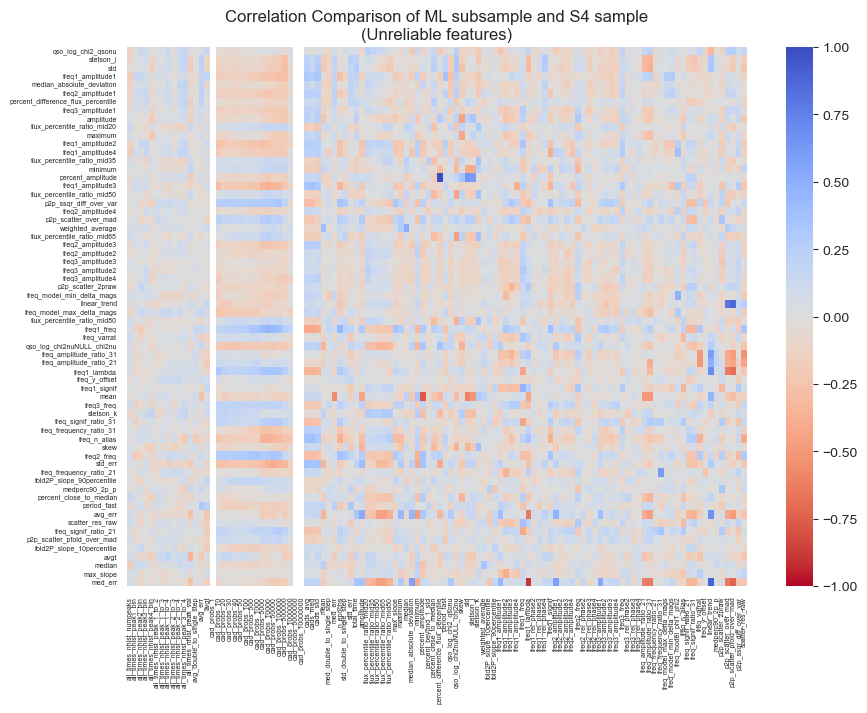

In [35]:
data = comp_s4_ml.loc[unrel_features, :].copy()
fig_title = "Correlation Comparison of ML subsample and S4 sample\n" \
    "(Unreliable features)"
x_label = "Cesium feature"
y_label = "Unreliable cesium feature"
fig_filename = IMAGE_FOLDER + "FE_25_01_CorrComparison_ML_S4_UnrelFeat.jpg"
draw_heatmap(data,
             fig_title=fig_title, xlabel=None, ylabel=None, xsize=5, ysize=5,
             fig_filename=fig_filename,
             kwargs={'vmin': -1.0, 'vmax': 1.0,
                     'xticklabels': True, 'yticklabels': True, 'cmap': 'coolwarm_r'})

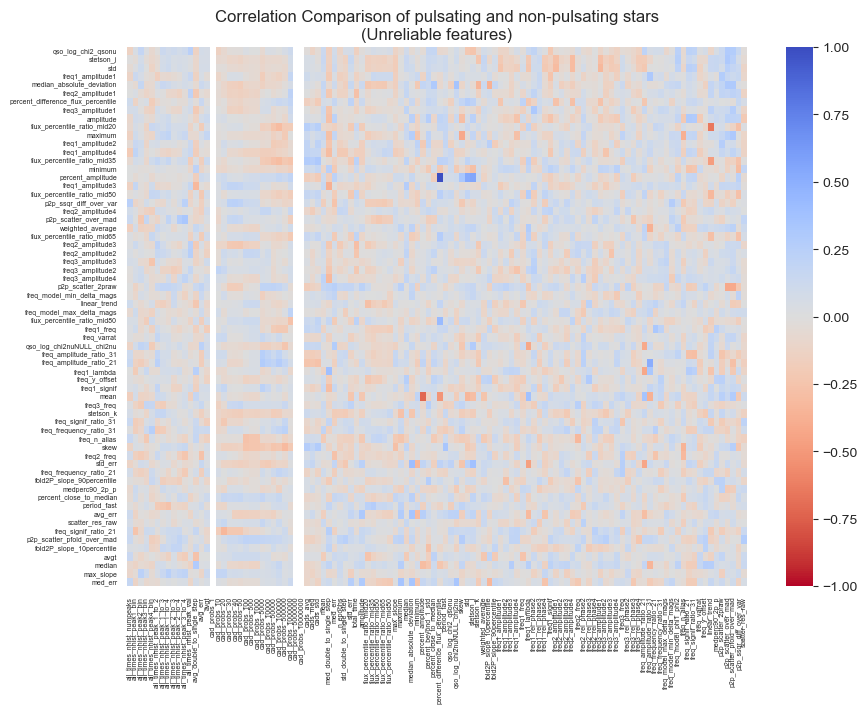

In [36]:
data = comp_p_np.loc[unrel_features, :].copy()
fig_title = "Correlation Comparison of pulsating and non-pulsating stars\n" \
    "(Unreliable features)"
x_label = "Cesium feature"
y_label = "Unreliable cesium feature"
fig_filename = IMAGE_FOLDER + "FE_25_02_CorrComparison_P_NP_UnrelFeat.jpg"
draw_heatmap(data,
             fig_title=fig_title, xlabel=None, ylabel=None, xsize=5, ysize=5,
             fig_filename=fig_filename,
             kwargs={'vmin': -1.0, 'vmax': 1.0,
                     'xticklabels': True, 'yticklabels': True, 'cmap': 'coolwarm_r'})

## Summary

**CONCLUSION:**

- We have seen that there can be a lot of "unreliable" features.
- Analyzing them all in detail will take too much time.
- Hence, we will go ahead with the ML model training and optimization and go back to the feature list after the algorithm has detected the more relevant features for pulsation detection.
- The next steps will be the following ones:
  - Train and optimize a ML model with S4 sample, using **all** _cesium_ features. Validate the model and write down the performance of the model (metrics).
  - Get the feature importance list.
  - Check the more relevant features in that list against the list of "unreliable" features.
  - Remove any "unreliable" feature that ruened out to be a relevant feature for classification. Re-train, re-optimize, re-validate the model. Compare the performances of the two models.